In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import VECM, select_order
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt
from Codigo import *
import seaborn as sn
sn.set(style="whitegrid")

### Cargar Datos

In [11]:
Datos = Tachos('../Alemania_Reducida.csv')
data = Datos[['PIB (US$ a precios constantes de 2010)','Gasto de consumo final de los hogares (US$ a precios constantes de 2010)','Gasto nacional bruto (US$ a precios constantes de 2010)']].dropna(axis = 0)
data.columns = ['PIB','Inversión','Gasto']
data.dropna(axis =1, inplace= True)
data.index = pd.date_range(start='1970-12-31', periods=len(data), freq='Y')

### Analisis de Estacionariedad a las Variables

In [12]:
DFuller(data['PIB'])
DFuller(data['Gasto'])
DFuller(data['Inversión'])

Estadístico ADF: -0.6667260211077259
Valor p: 0.8551810506341725
No podemos rechazar la hipótesis nula; la serie no es estacionaria.
Estadístico ADF: -0.6160967317000873
Valor p: 0.8673031853643212
No podemos rechazar la hipótesis nula; la serie no es estacionaria.
Estadístico ADF: -1.6102151214195712
Valor p: 0.47786271672686587
No podemos rechazar la hipótesis nula; la serie no es estacionaria.


In [13]:
data['Inversión'] = data['Inversión'].diff()
data.dropna(axis =0 ,inplace= True)

### Amalisis de Correlacion de las Variables

### Analisis de Cointegración

In [14]:
print('Al 99% de confianza')
Johansen_Test(data,1,0,2)

Al 99% de confianza
Matriz de Valores Criticos vs Maximo Valor Propio
            cvm     eigv        Hipotesis
r = 0     2.7055    66.7925    Se rechaza r = 0, existe mas de 0 relación/nes de cointegración
r = 1     3.8415    21.9288    Se rechaza r = 1, existe mas de 1 relación/nes de cointegración
r = 2     6.6349    3.0358    No hay suficiente evidencia para rechazar la hipótesis nula de r = 2.
Tabla de Valores Criticos vs Traza Estadistica
            cvt     TS          Hipotesis
r = 0     2.7055    91.757    Se rechaza r = 0, existe mas de 0 relación/nes de cointegración
r = 1     3.8415    24.9646    Se rechaza r = 1, existe mas de 1 relación/nes de cointegración
r = 2     6.6349    3.0358    No hay suficiente evidencia para rechazar la hipótesis nula de r = 2.


### Modelo Inicial

In [15]:

lag_order = select_order(data, maxlags= 10, deterministic= 'n', seasons= 0)

print(lag_order)

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 10, BIC -> 0, FPE -> 0, HQIC ->  0>


In [16]:
model = VECM(data[['PIB','Gasto']],exog = data['Inversión'] ,coint_rank= 2, k_ar_diff= 10)
result = model.fit()
alpha_matrix = result.alpha
print("Matriz de Coeficientes de Corrección de Errores (alpha):")
print(alpha_matrix)


Matriz de Coeficientes de Corrección de Errores (alpha):
[[-0.27126534  0.3226526 ]
 [ 0.03704883 -0.03625262]]


In [17]:
print(result.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation PIB
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
exog1          1.1180      0.200      5.577      0.000       0.725       1.511
L1.PIB        -0.3028      0.181     -1.676      0.094      -0.657       0.051
L1.Gasto       0.1919      0.207      0.926      0.354      -0.214       0.598
L2.PIB        -0.6883      0.183     -3.767      0.000      -1.046      -0.330
L2.Gasto       0.5801      0.206      2.812      0.005       0.176       0.985
L3.PIB        -0.2473      0.206     -1.201      0.230      -0.651       0.156
L3.Gasto      -0.1429      0.206     -0.694      0.487      -0.546       0.260
L4.PIB         0.1644      0.220      0.749      0.454      -0.266       0.595
L4.Gasto      -0.3183      0.224     -1.418      0.156      -0.758       0.122
L5.PIB        -0.7505      0.256     -2.927     

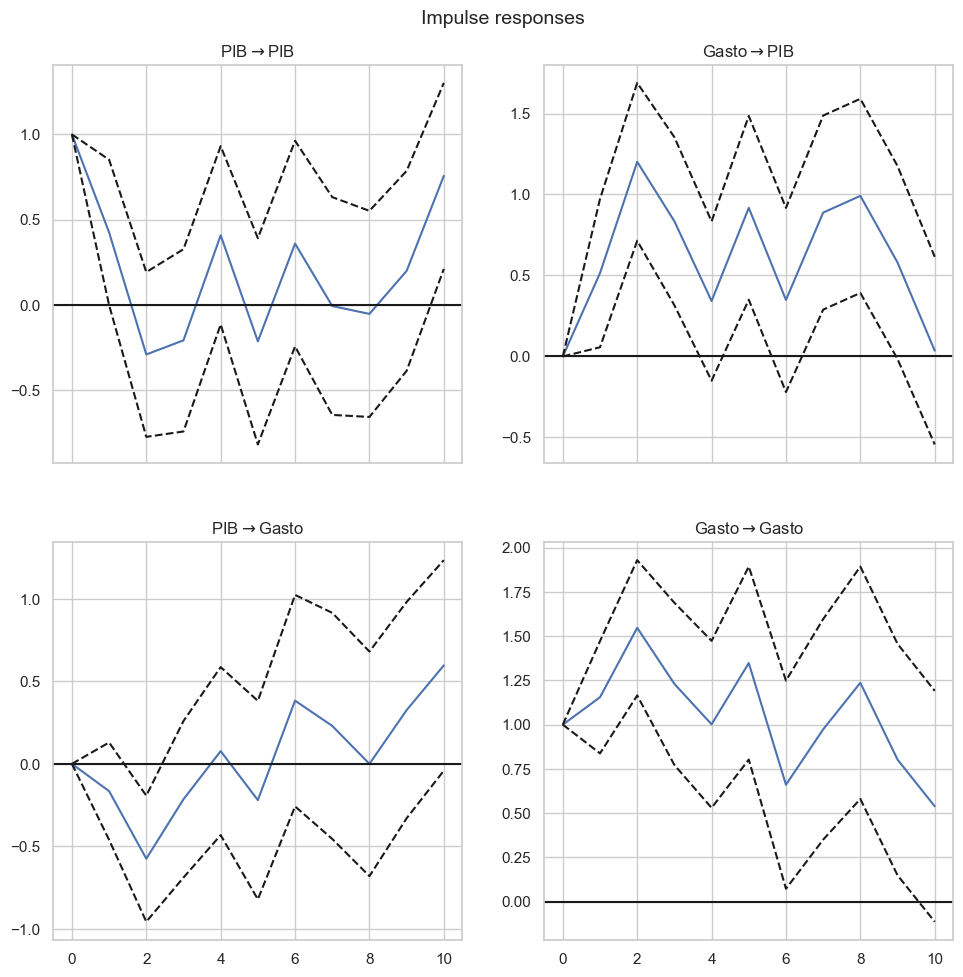

In [18]:
# Paso 6: Análisis de Impulsos-Respuestas
irf = result.irf(periods=10)
irf.plot()
plt.show()

result.get_forecast